In [13]:
import numpy as np
import sputter as sp
import matplotlib.pyplot as pl
import everest as ev
import csv
from numpy import genfromtxt
from everest import detrender
from everest.math import SavGol, Scatter, Downbin
from astropy.stats import median_absolute_deviation as mad
from numpy.polynomial import polynomial as P
from tqdm import tqdm
% matplotlib inline

In [2]:
datapath = '/Users/nks1994/Documents/Research/everest/docs/c0'
dataloc = '.csv'

# CAMPAIGN 1

tags = []
mags = []
with open((datapath+str(1)+dataloc),'r') as f:
    data = csv.reader(f)
    for i,row in enumerate(data):
        if i == 0:
            continue
        else:
            tags.append(row[0])
            mags.append(row[1])

In [41]:
cdpps = []
for t in tags:
    star = ev.Everest(int(t))
    cdpps.append(star.cdpp)

INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 201735103.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 201505924.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 201266988.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 201587162.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 201610732.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 201478305.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 201326528.
INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS f

KeyboardInterrupt: 

In [3]:
cdpps = np.load('k21cdpps.npy')
length = len(cdpps)

(5, 20)

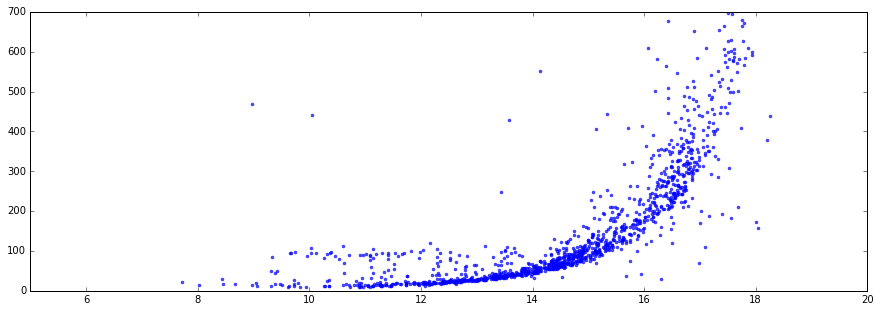

In [4]:
fig = pl.figure(figsize=(15,5))
pl.plot(mags[:length],cdpps,'b.',alpha = 0.7)
pl.ylim([0,700])
pl.xlim([5,20])

In [137]:
#def rawCDPP(mag,motion):
mag = 10
motion = 0
star = np.load('stars/larger_aperture/mag'+str(mag)+'motion'+str(motion)+'.npz')
fpix = star['fpix']


In [132]:
def simCDPP(mag,motion):

    MN = sp.MotionNoise()
    flux,rawflux = MN.DetrendFpix(mag,motion)

    CDPP = MN.CDPP(flux)

    return CDPP

In [135]:
simcdpps = []
for i in tqdm(range(5)):
    n = i + 10
    simcdpps.append(simCDPP(n,1))

100%|██████████| 5/5 [00:27<00:00,  5.37s/it]


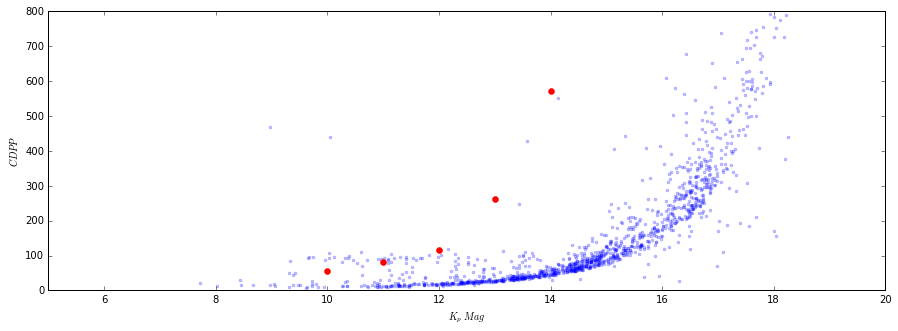

In [136]:
fig = pl.figure(figsize=(15,5))
pl.plot(mags[:length],cdpps,'b.',alpha = 0.25)
pl.ylim([0,800])
pl.xlim([5,20])
xs = [i+10 for i in range(5)]
pl.plot(xs,simcdpps,'r.',markersize=12)
pl.xlabel(r'$K_p\ Mag$')
pl.ylabel(r'$CDPP$')

In [106]:
t = np.linspace(0,20,1399)

from scipy.optimize import curve_fit

mags = [float(i) for i in mags] 

def fitFunc(x, a, b, c):
    return a * np.exp(b*x) + c

In [107]:
fitParams, fitCovariance = curve_fit(fitFunc, t, cdpps, p0=(1,1e-5,1))

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

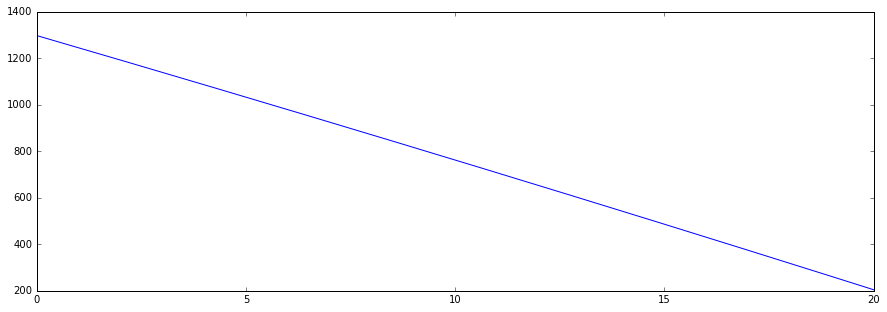

In [101]:
fig = pl.figure(figsize=(15,5))
sigma = [fitCovariance[0,0], \
         fitCovariance[1,1], \
         ]
pl.plot(t, fitFunc(t, fitParams[0], fitParams[1], fitParams[2]))
#        t, fitFunc(t, fitParams[0] + sigma[0], fitParams[1] - sigma[1], fitParams[2] + sigma[2]),\
#        t, fitFunc(t, fitParams[0] - sigma[0], fitParams[1] + sigma[1], fitParams[2] - sigma[2]))

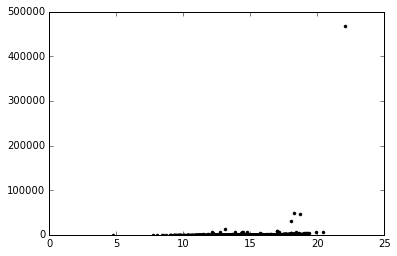

In [104]:
pl.plot(mags[:length],cdpps,'k.')

In [126]:
msort = sorted(mags,key=int)
d = {k:m for k,m in enumerate(msort[:length])}
csort = cdpps.sorted(key=d.get)

TypeError: an integer is required (got type builtin_function_or_method)

In [129]:
csort = cdpps.reshape(mags[:length])

ValueError: sequence too large; cannot be greater than 32